Final Project: Predicting Thyroid Cancer Recurrence using Machine Learning


Presentation - https://docs.google.com/presentation/d/1agnSLcxmN5o89hOMZpi5l6CWBlaitpY5BMFBlGRN7KM/edit?usp=sharing

# Names

- Ethan Arnn
- Krish Kankure
- Naeem Khwajazada
- Jiya Makhija
- Ishita Takkar

# Abstract

Thyroid cancer recurrence is a relatively rare but critical clinical outcome, and early identification of high-risk patients could help guide personalized follow-up and treatment strategies. In this project, we aimed to develop a machine learning model capable of predicting recurrence with an AUC greater than 90% while uncovering key clinical and pathological predictors. Our hypothesis was that patients with more severe disease,reflected in advanced stage or aggressive histological subtypes like Medullary or Anaplastic carcinoma, would be more likely to experience recurrence.

We curated a subset of relevant features from a larger dataset, including age at diagnosis, clinical and pathological stage, histology, lymphovascular invasion, and treatment history. After addressing class imbalance through SMOTE, we trained and evaluated three models: Random Forest with class weighting, Logistic Regression with SMOTE, and XGBoost with SMOTE. While none of the models surpassed the 90% AUC threshold, Logistic Regression with SMOTE emerged as the most promising, achieving an AUC of 0.82 and a recall of 74% for recurrence cases, outperforming other models in identifying true positives.

Feature importance analysis revealed that histology subtype - particularly Medullary carcinoma - along with prior radiation treatment, were the most influential predictors. Surprisingly, staging variables had lower importance scores, suggesting that treatment history and tumor biology may be more predictive of recurrence than cancer stage alone. These findings align partially with our hypothesis and demonstrate the potential of combining oversampling techniques with interpretable models to support clinical decision-making in thyroid cancer care.

Can we develop a model that predicts thyroid cancer recurrence with >90% AUC and reveals key predictors of recurrence?

## Background and Prior Work

Thyroid disease, encompassing conditions like hypothyroidism and hyperthyroidism, affects millions globally. The thyroid gland, located in the neck, plays a pivotal role in regulating metabolism through hormone secretion. Disorders arise when the gland produces either insufficient or excessive hormones, leading to symptoms such as fatigue, weight fluctuations, and mood disturbances. Common causes include autoimmune diseases like Hashimoto's thyroiditis and Graves' disease, iodine deficiency, and certain medications. Risk factors encompass age, gender (with women being more susceptible), family history, and exposure to radiation. Early diagnosis and appropriate treatment are crucial to manage symptoms and prevent complications.

Recent advancements have seen the integration of machine learning (ML) techniques to enhance the prediction and management of thyroid diseases. For instance, Song et al. (2022) utilized ML models to predict the recurrence of papillary thyroid cancer, identifying tumor size, age, and lymph node involvement as significant predictors. Their approach demonstrated the potential of ML in stratifying recurrence risks effectively.1

Another study by Islam et al. (2022) conducted a comparative analysis of various ML algorithms, including Random Forest, Support Vector Machine, and K-Nearest Neighbors, to classify thyroid disease types. Their findings highlighted the efficacy of these models in accurately diagnosing different thyroid conditions, emphasizing the importance of feature selection in enhancing model performance.2

Furthermore, research by Dov et al. (2019) explored the application of weakly supervised instance learning for predicting thyroid malignancy from cytopathology images. Their methodology addressed challenges in analyzing whole-slide images, demonstrating that ML can assist in identifying malignancies with performance comparable to human experts.3 arXiv

These studies collectively underscore the transformative role of machine learning in thyroid disease management, offering tools for improved diagnosis, risk assessment, and personalized treatment strategies.

^ Song, S. H., Kim, Y., & Park, Y. J. (2022). Predicting Recurrence in Papillary Thyroid Cancer Using Machine Learning Models. Journal of Clinical Medicine, 11(17), 5175. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9405591/

^ Islam, S. S., Haque, M. S., Miah, M. S. U., Sarwar, T. B., & Nugraha, R. (2022). Application of machine learning algorithms to predict the thyroid disease risk: an experimental comparative study. PeerJ Computer Science, 8, e898. https://peerj.com/articles/cs-898/

^ Dov, D., Kovalsky, S. Z., Assaad, S., Pendse, A. A., Cohen, J., Range, D. E., Henao, R., & Carin, L. (2019). Weakly Supervised Instance Learning for Thyroid Malignancy Prediction from Whole Slide Cytopathology Images. arXiv preprint arXiv:1904.12739. https://arxiv.org/abs/1904.12739

# Hypothesis


Our hypothesis is that our model will predict that patients with more severe cases of thyroid cancer, determined by stage, or patients with more severe histologies, such as Medullary or Anaplastic, will have a higher likelihood for thyroid disease recurrence. The reasoning for the assumption stems from the fact that thyroid disease recurrence is generally uncommon along with the notion that histologies that describe carcinoma are known to flare after receiving treatment.

# Data

### **Dataset #1**
  - **Dataset Name:** Institutional Thyroid Cancer Dataset
  - **Link to the dataset:** https://data.mendeley.com/datasets/57726vkm48/1
  - **Number of observations:** 5351
  - **Number of variables:** 59
  - **Description:** This dataset comes from Penn Medicine cancer registries and contains data from over 5000 tumors from over 5000 patients. We believe that some of the metrics in this data set such as information about the patients (be that age, race, or sex), types of treatments recieved, and the status of their condition will serve useful in discerning which of these metrics correlate with recurrence the most. When it comes to wrangling the data, a large portion of these metrics are stored as strings which can be difficult to work with. Luckily, these string variables can be converted into binary representations or classified into 1 of a few distinct categories which will make interpreting this data a lot simpler.
    

## Institutional Thyroid Cancer Dataset

Before we get into parsing the data from this file, we need to setup the tools that we will be using.

In [3]:
# Data Analysis Tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Etc.
import warnings
warnings.filterwarnings('ignore')

Let us take a quick look at the size of this dataset and check out what kind of metrics they tracked. This will serve useful in cleaning our data so that we can train our model.

In [4]:
df_og = pd.read_csv('thyroid_cancer.csv')
print('Shape of the dataset:', df_og.shape, '\n')

print('Columns in the dataset:')
for i in range(0, len(df_og.columns)):
    if (i+1) % 8 == 0:
        print(df_og.columns[i])
    elif i+1 == len(df_og.columns):
        print(df_og.columns[i], end='\n\n')
    else :
        print(df_og.columns[i], end=', ')

df_og.head()

Shape of the dataset: (5351, 59) 

Columns in the dataset:
TumorID.blind, patientID.blind, ReportingHospitalID, PrimarySequence, ClassCaseDesc, AnalyticYn, DateFirstContact.x, DateDx.x
AgeAtDx.x, PrimarySiteCode, PrimarySiteDesc, PrimarySiteCategory, PrimarySiteSubcategory.x, HistologyCode, HistologyDesc, Laterality
Grade, LvInvasion, ClinT, ClinN, ClinM, ClinStage, PathT, PathN
PathM, PathStage, SummaryStage, FirstCourseSummary, MstDefSurgeryDate, SurgeryDesc, MstDefRtDate, RtDesc
RtDoseCgy, RtBoostDoseCgy, RtModalityDesc, RtVolumeDesc, MstDefChemoDate, ChemoDesc, MstDefHormoneDate, HormoneDesc
MstDefImmunoDate, ImmunoDesc, FirstRecurrenceDate, FirstRecurrenceType, Sex, Race, PrimarySiteSubcategory.y, DateFirstContact.y
DateDx.y, AgeAtDx.y, LastContactDate, VitalStatus, DeathDate, index, death, recurred
dx.to.surg.days, firstcontact.to.surg.days, surg.to.radtx.days



,TumorID.blind,patientID.blind,ReportingHospitalID,PrimarySequence,ClassCaseDesc,AnalyticYn,DateFirstContact.x,DateDx.x,AgeAtDx.x,PrimarySiteCode,...,AgeAtDx.y,LastContactDate,VitalStatus,DeathDate,index,death,recurred,dx.to.surg.days,firstcontact.to.surg.days,surg.to.radtx.days
0,1,1,Hospital.A,Malignant primary #2,14 - Initial diagnosis at the reporting facili...,1,2017,2017,62,C73.9,...,62,2020.0,True,NaN,1,alive,no recurrence,0.0,0.0,NaN
1,2,2,Hospital.A,Malignant primary #2,14 - Initial diagnosis at the reporting facili...,1,2015,2015,67,C73.9,...,67,2018.0,True,NaN,2,alive,no recurrence,0.0,0.0,NaN
2,3,3,Hospital.A,Malignant primary #2,21 - Initial diagnosis elsewhere AND PART of t...,1,2016,2015,70,C73.9,...,70,2020.0,True,NaN,3,alive,no recurrence,22.0,-48.0,48.0
3,4,4,Hospital.A,Malignant primary #2,21 - Initial diagnosis elsewhere AND PART of t...,1,2015,2015,68,C73.9,...,68,2020.0,True,NaN,4,alive,recurrence,48.0,0.0,64.0
4,5,5,Hospital.A,Malignant primary #2,14 - Initial diagnosis at the reporting facili...,1,2015,2015,57,C73.9,...,57,2020.0,True,NaN,5,alive,no recurrence,0.0,0.0,NaN


In [5]:
cols = ['PrimarySequence', 'DateDx.x', 'AgeAtDx.x', 'HistologyDesc', 'LvInvasion', 'ClinStage', 'PathStage', 'FirstCourseSummary','MstDefSurgeryDate', 'SurgeryDesc','MstDefRtDate', 'MstDefHormoneDate','Sex', 'Race', 'recurred'] 
df = pd.read_csv("thyroid_cancer.csv", usecols=cols)
df.head()

,PrimarySequence,DateDx.x,AgeAtDx.x,HistologyDesc,LvInvasion,ClinStage,PathStage,FirstCourseSummary,MstDefSurgeryDate,SurgeryDesc,MstDefRtDate,MstDefHormoneDate,Sex,Race,recurred
0,Malignant primary #2,2017,62,Papillary & Follicular Adenocarcinoma,Lymph-vascular Invasion stated as Not Present,1,Unknown,"S, H",2017.0,Total thyroidectomy,NaN,2017.0,F,Black or African American,no recurrence
1,Malignant primary #2,2015,67,"Papillary Adenocarcinoma, NOS",Lymph-vascular Invasion stated as Not Present,1,Unknown,S,2015.0,Lobectomy WITH isthmus,NaN,NaN,M,White,no recurrence
2,Malignant primary #2,2015,70,"Papillary Adenocarcinoma, NOS",Lymph-vascular Invasion stated as Not Present,Unknown,3,"S, R, H",2015.0,Total thyroidectomy,2016.0,2015.0,M,White,no recurrence
3,Malignant primary #2,2015,68,Papillary & Follicular Adenocarcinoma,Lymph-vascular Invasion Present/Identified,Unknown,4A,"S, R, H",2015.0,Total thyroidectomy,2016.0,2015.0,M,White,recurrence
4,Malignant primary #2,2015,57,Papillary & Follicular Adenocarcinoma,Lymph-vascular Invasion stated as Not Present,Unknown,Unknown,"S, H",2015.0,Total thyroidectomy,NaN,2015.0,F,Black or African American,no recurrence


We went from 59 feature columns to 15. Many were removed due to a lack of available data, for example, Grade, RtDoseCgy, RtBoostDoseCgy, ImmunoDate, ImmunoDesc, etc. had over 95% of datapoints unavailable. In other cases there were duplicate columns that existed as a result of merging, for example DateDx.y and AgeAtDx.y. Some columns were removed due to having similar measurements that risked unstable modeling due to collinearity, for example Laterality, ClinT/N/M, PathT/N/M. Finally, we found some columns to not be useful, for example we removed columns such as Death and DeathDate because if someone has passed away, there is no risk of recurrence. For example, the Grade column was dropped because over 95% of its values were marked as unknown or not applicable, making it uninformative for modeling.

In [6]:
df_og['Grade'].value_counts(normalize=True)

Grade
Grade/differentiation unknown, not stated, or not applicable    0.958512
Grade III                                                       0.015698
Grade I                                                         0.012895
Grade IV                                                        0.010092
Grade II                                                        0.002803
Name: proportion, dtype: float64

For the columns we decided to keep, we performed a feature selection process to clean our data, only keeping informative variables that were interpretable. Below is a summary of the columns we are keeping and any changes that are being applied:

In [7]:
rename_map = {'PrimarySequence':'sequence', 'DateDx.x': 'date_at_diagnosis', 'AgeAtDx.x': 'age_at_diagnosis', 
              'HistologyDesc': 'histology', 'LvInvasion': 'lymphovascular_invasion', 'ClinStage': 'clinical_stage', 
              'PathStage': 'pathological_stage', 'FirstCourseSummary': 'first_course_summary', 
              'MstDefSurgeryDate': 'surgery_date', 'SurgeryDesc': 'surgery_type', 'MstDefRtDate': 'radiation_date', 
              'MstDefHormoneDate': 'hormone_therapy_date', 'Sex': 'sex', 'Race': 'race', 'recurred': 'recurred'}
df.rename(columns = rename_map, inplace=True)

**PrimarySequence -> sequence:**

We chose to filter out cases where it is not the patient’s first time with a cancerous tumor. The categories being kept are:
- "Only one malignant primary in the patient's lifetime"
- "First of two or more malignant primaries"

This standardizes the data because we’re measuring the risk of recurrence if someone has had thyroid cancer once, and reduces the risk of unintentionally modeling something else.

In [8]:
df = df[(df['sequence'] == "Only one malignant primary in the patient's lifetime") | 
        (df['sequence'] == "First of two or malignant primaries")]

**DateDx.x -> date_at_diagnosis**

We changed this column name to date_of_diagnosis for improved interpretability. This column represents the year at which the individual was diagnosed with thyroid cancer.

In [9]:
df['date_at_diagnosis'].value_counts()

date_at_diagnosis
2016    688
2015    666
2013    640
2011    632
2012    617
2014    606
2017    578
2010     32
2006      1
2009      1
Name: count, dtype: int64

**AgeDx.x -> age_at_diagnosis:**

We changed this column name to age_of_diagnosis for improved interpretability. This column represents the age at which the individual was diagnosed with thyroid cancer.

- Only one row had an age recorded as '>99', so we replaced it with 100 to maintain data integrity instead of dropping it.
- We converted the type to integer for the entire column as it was object before.

In [10]:
df['age_at_diagnosis'] = df['age_at_diagnosis'].replace('>99', '100')
df['age_at_diagnosis'] = df['age_at_diagnosis'].astype(int)
print('Ensure that the column is in the correct format: ', df['age_at_diagnosis'].dtype)

Ensure that the column is in the correct format:  int64


**HistologyDesc -> histology:**

Instead of keeping the medical ICD-O-3 codes, we have chosen to group the descriptions into medically relevant groups (e.g. papillary, follicular, medullary, anaplastic). This improves the readability of our data while keeping the significance.

We grouped tumor histologies into five clinically meaningful categories to simplify analysis while preserving medical relevance. 
- Papillary and follicular carcinomas are the most common types of thyroid cancer and generally have excellent prognoses.
- Medullary carcinoma, arising from parafollicular cells, is rarer and more aggressive.
- Anaplastic carcinoma is the most aggressive and least common, often diagnosed at an advanced stage.
- All other rare, mixed, or non-specific types were grouped under Other.

In [11]:
print('Before remapping the histologies:\n', df['histology'].value_counts(), '\n\n')
histology_map = {
    'Papillary Adenocarcinoma, NOS': 'Papillary',
    'Papillary & Follicular Adenocarcinoma': 'Papillary',
    'Papillary Carcinoma, NOS': 'Papillary',
    
    'Follicular Adenocarcinoma, NOS': 'Follicular',
    'Oxyphilic Adenocarcinoma': 'Follicular',
    
    'Medullary Carcinoma, NOS': 'Medullary',
    
    'Carcinoma, Undifferentiated, NOS': 'Anaplastic',
    'Giant & Spindle Cell Carcinoma': 'Anaplastic',
    'Squamous Cell Carcinoma, NOS': 'Anaplastic',
    
    'Adenocarcinoma, NOS': 'Other',
    'Adenocarcinoma with mixed subtypes': 'Other',
    'Carcinoma, NOS': 'Other',
    'Nonencapsulated Sclerosing Carcinoma': 'Other',
    'Carcinoid Tumor, Malignant': 'Other',
    'Clear Cell Adenocarcinoma, NOS': 'Other',
    'Neoplasm': 'Other'
}
df['histology'] = df['histology'].replace(histology_map)
print('After remapping the histologies:\n', df['histology'].value_counts())

Before remapping the histologies:
 histology
Papillary Adenocarcinoma, NOS            2158
Papillary & Follicular Adenocarcinoma    1950
Follicular Adenocarcinoma, NOS            159
Oxyphilic Adenocarcinoma                   75
Medullary Carcinoma, NOS                   61
Carcinoma, Undifferentiated, NOS           29
Nonencapsulated Sclerosing Carcinoma       10
Neoplasm                                    5
Squamous Cell Carcinoma, NOS                3
Adenocarcinoma, NOS                         3
Carcinoma, NOS                              3
Clear Cell Adenocarcinoma, NOS              2
Carcinoid Tumor, Malignant                  1
Giant & Spindle Cell Carcinoma              1
Papillary Carcinoma, NOS                    1
Name: count, dtype: int64 


After remapping the histologies:
 histology
Papillary     4109
Follicular     234
Medullary       61
Anaplastic      33
Other           24
Name: count, dtype: int64


**LvInvasion -> lymphovascular_invasion:**

We chose to keep this variable because it historically has high correlation with recurrence risk. The original dataset had three categories: Lymph-vascular Invasion stated as Not Present, Lymph-vascular Invasion Present/Identified, and Unknown/Indeterminate/not mentioned in path report which we have chosen to convert as Present, Not present, and Unknown for simplified computability.

In [12]:
print('Before remapping the Lymphovascular Invasion:\n', df['lymphovascular_invasion'].value_counts(), '\n\n')
invasion_map = {
    'Lymph-vascular Invasion stated as Not Present': 'Not Present',
    'Lymph-vascular Invasion Present/Identified': 'Present',
    'Unknown/Indeterminate/not mentioned in path report': 'Unknown'
}
df['lymphovascular_invasion'] = df['lymphovascular_invasion'].replace(invasion_map)
df['lymphovascular_invasion'] = df['lymphovascular_invasion'].fillna('Unknown')
print('After remapping the Lymphovascular Invasion:\n', df['lymphovascular_invasion'].value_counts())

Before remapping the Lymphovascular Invasion:
 lymphovascular_invasion
Lymph-vascular Invasion stated as Not Present         3244
Lymph-vascular Invasion Present/Identified             721
Unknown/Indeterminate/not mentioned in path report     491
Name: count, dtype: int64 


After remapping the Lymphovascular Invasion:
 lymphovascular_invasion
Not Present    3244
Present         721
Unknown         496
Name: count, dtype: int64


**PathStage -> pathological_stage:**

We chose to keep this variable because represents the most definitive assessment of disease extent, this is determined after surgical removal and microscopic examination of the tumor. “clinical_stage” represents estimates prior to treatment but “pathological_stage” is more accurate incorporating evidence of tumor size, nodal involvement, and metastasis. This will allow our model to learn from the true biological severity of the disease which may improve recurrence prediction. 

The original data was separated into substages (4A, 4B, etc.); however, to simplify modeling we grouped all substages into broader categories: Stages 0, 1, 2, 3, 4, and retained the “Unknown” to account for missing data.

In [13]:
print('Before remapping the Pathological Stage:\n', df['pathological_stage'].value_counts(), '\n\n')
p_stage_map = {"4A": "4", "4B": "4", "4C": "4", "Unknown": "-1"}
df['pathological_stage'] = df['pathological_stage'].replace(p_stage_map)
df['pathological_stage'] = df['pathological_stage'].fillna("-1")
df['pathological_stage'] = df['pathological_stage'].astype(int)
print('After remapping the Pathological Stage:\n', df['pathological_stage'].value_counts())

Before remapping the Pathological Stage:
 pathological_stage
1          2407
Unknown     949
3           508
2           250
4A          149
4C           47
4B           25
Name: count, dtype: int64 


After remapping the Pathological Stage:
 pathological_stage
 1    2407
-1    1075
 3     508
 2     250
 4     221
Name: count, dtype: int64


**ClinStage -> clinical_stage:**

We chose to keep this variable because it represents the severity of the thyroid cancer at the time of diagnosis before any surgery or therapy. This variable could have strong predictive power in determining recurrence because it represents how far along the cancer got before any treatments were given.

The original data was separated into substages (4A, 4B, etc.); however, to simplify modeling we grouped all substages into broader categories: Stages 0, 1, 2, 3, 4, and retained the “Unknown” to account for missing data.

In [14]:
print('Before remapping the Clinical Stage:\n', df['clinical_stage'].value_counts(), '\n\n')
c_stage_map = {"4A": "4", "4B": "4", "4C": "4", "Unknown": "-1"}
df['clinical_stage'] = df['clinical_stage'].replace(c_stage_map).fillna("-1").astype(int)
df['clinical_stage'] = df['clinical_stage'].fillna("-1").astype(int)
df['clinical_stage'] = df['clinical_stage'].astype(int)
print('After remapping the Clinical Stage:\n', df['clinical_stage'].value_counts())

Before remapping the Clinical Stage:
 clinical_stage
1          2263
Unknown    1413
2           375
3           226
4A           87
4C           58
4B           21
Name: count, dtype: int64 


After remapping the Clinical Stage:
 clinical_stage
 1    2263
-1    1431
 2     375
 3     226
 4     166
Name: count, dtype: int64


**MstDefSurgeryDate -> surgery_date**

The surgery_date column originally contained year values in float format (e.g., 2014.0). To clean the data and make it more consistent for analysis and modeling, we converted this column from float to integer format (e.g., 2014). This ensures the values are treated as discrete years rather than continuous numeric data, improving clarity and interpretability.

In [15]:
df = df.dropna(subset=['surgery_date'])
df['surgery_date'] = df['surgery_date'].astype(int)

**SurgeryDesc -> surgery_type:**

We retained the field of surgical descriptions, renaming the column to surgery_type for readability, and grouping the descriptions into more interpretable grouped categories. The original dataset had around 14 specific surgical descriptions which we grouped into more meaningful categories:
- "Total thyroidectomy": including subtotal or near-total resections
- "Lobectomy": including lobectomy with or without isthmus removal
- "Isthmectomy": procedures limited to the isthmus
- "Less than lobectomy": partial or local excisions
- "Extended lobectomy": lobe removal with partial contralateral involvement
- "No surgery": explicitly stated or unknown whether surgery was performed
- "Other/Unknown": vague or uncategorized procedures (e.g., “Surgery, NOS”)

In [16]:
print('Before remapping the Surgery Type:\n', df['surgery_type'].value_counts(), '\n\n')
s_type_map = {'Total thyroidectomy': 'Thyroidectomy', 'None; no surgery of primary site': 'None', 
              'Surgery, NOS': 'Other', 'Lobectomy WITH isthmus': 'Lobectomy', 'Lobectomy ONLY': 'Lobectomy', 
              'Removal of less than a lobe, Removal of a partial lobe ONLY': 'Less than lobectomy',
              'Subtotal or near total thyroidectomy': 'Thyroidectomy', 'Lobectomy and/or isthmectomy': 'Lobectomy',
              'Removal of a lobe and partial removal of the contralateral lobe': 'Extended Lobectomy', 
              'Thyroidectomy, NOS': 'Thyroidectomy','Isthmectomy ONLY': 'Isthmectomy',
              'Removal of less than a lobe, NOS': 'Less than lobectomy', 
              'Removal of less than a lobe, Local surgical excision': 'Less than lobectomy',
              'Unknown if surgery performed': 'None', 'Local tumor destruction, NOS': 'Other'}
df['surgery_type'] = df['surgery_type'].replace(s_type_map)
print('After remapping the Surgery Type:\n', df['surgery_type'].value_counts())

Before remapping the Surgery Type:
 surgery_type
Total thyroidectomy                                                3626
Lobectomy ONLY                                                      296
Lobectomy WITH isthmus                                              273
Subtotal or near total thyroidectomy                                 46
Lobectomy and/or isthmectomy                                         37
Isthmectomy ONLY                                                     19
Removal of less than a lobe, Removal of a partial lobe ONLY          16
Removal of a lobe and partial removal of the contralateral lobe      13
Thyroidectomy, NOS                                                   13
Removal of less than a lobe, Local surgical excision                  4
Surgery, NOS                                                          3
Removal of less than a lobe, NOS                                      3
Local tumor destruction, NOS                                          1
Name: count, dt

**MstDefRtDate -> radiation_date**

The radiation_date column indicated the year a patient received radiation therapy, but also included many missing values. To simplify this feature for modeling, we created a new binary column, had_radiation, where 1 indicates the patient received radiation therapy (non-null value) and 0 indicates they did not (null value in the original column). This transformation preserves the clinical meaning while making the feature easier to interpret and use in predictive models.

In [17]:
df['had_radiation'] = df['radiation_date'].notna().astype(int)
df['had_radiation'].value_counts(dropna = False)

had_radiation
0    2576
1    1774
Name: count, dtype: int64

**MstDefHormoneDate -> hormone_therapy_date**

The original hormone_therapy_date column recorded the year a patient received hormone therapy, with missing values for those who did not receive it or lacked documentation.

To make this information more accessible for modeling, we created a binary column, had_hormone_therapy, where 1 indicates hormone therapy was administered and 0 indicates it was not. This transformation simplifies the data while retaining the clinical significance of hormone therapy in thyroid cancer treatment.

In [18]:
df['had_hormone_therapy'] = df['hormone_therapy_date'].notna().astype(int)
df['had_hormone_therapy'].value_counts(dropna = False)

had_hormone_therapy
1    3534
0     816
Name: count, dtype: int64

**Race -> race:**

We changed the name of this category from Race to race to remain consistent with other column names. There were many specific categories of races listed, some with few datapoints that wouldn’t be useful for our predictions. Because of this, we grouped the races into larger categories: “White”, “Black or African American”, “Asian”, “Indigenous”, “Pacific Islander”, and “Other/Unknown”.

In [19]:
print('Before remapping the Race:\n', df['race'].value_counts(), '\n\n')
race_map = {'Other': 'Other/Unknown', 'Unknown': 'Other/Unknown', 'Black': 'Black or African American', 
            'Multiple Races': 'Other/Unknown', 'Asian Indian': 'Asian', 'Asian Indian ': 'Asian', 
            'Other Asian, including Asian, NOS and Oriental, NO': 'Asian', 'Chinese': 'Asian', 'Filipino': 'Asian', 
            'American Indian or Alaska Native': 'Indigenous', 'Asian Indian or Pakistani, NOS': 'Asian', 
            'Native Hawaiian or Other Pacific Islander': 'Pacific Islander',
            'American Indian, Aleutian, or Eskimo': 'Indigenous', 'Pakistani': 'Asian'}
df['race'] = df['race'].replace(race_map)
print('After remapping the Race:\n', df['race'].value_counts())

Before remapping the Race:
 race
White                                                 3333
Black or African American                              453
Other/Unknown                                          199
Asian                                                  175
Multiple Races                                          44
Other                                                   36
Black                                                   29
Asian Indian                                            28
Unknown                                                 15
Other Asian, including Asian, NOS and Oriental, NO      10
Chinese                                                  8
Filipino                                                 7
American Indian or Alaska Native                         4
Asian Indian or Pakistani, NOS                           4
Native Hawaiian or Other Pacific Islander                3
Pakistani                                                1
American Indian, Aleuti

**Recurred**

The original recurred column contained categorical values: 'no recurrence' and 'recurrence'. To make the target variable compatible with machine learning models, we converted it into a binary format. In the new recurred column, 1 indicates that the patient experienced a recurrence of thyroid cancer, while 0 indicates no recurrence. This transformation standardizes the outcome variable for classification tasks.

In [20]:
recurrence_map = {'no recurrence': 0, 'recurrence': 1}
df['recurred'] = df['recurred'].map(recurrence_map)
df.head()

,sequence,date_at_diagnosis,age_at_diagnosis,histology,lymphovascular_invasion,clinical_stage,pathological_stage,first_course_summary,surgery_date,surgery_type,radiation_date,hormone_therapy_date,sex,race,recurred,had_radiation,had_hormone_therapy
39,Only one malignant primary in the patient's li...,2013,38,Papillary,Unknown,1,1,"S, H",2013,Thyroidectomy,NaN,2013.0,F,Black or African American,0,0,1
60,Only one malignant primary in the patient's li...,2015,76,Medullary,Not Present,-1,1,S,2015,Thyroidectomy,NaN,NaN,F,White,0,0,0
65,Only one malignant primary in the patient's li...,2006,58,Follicular,Unknown,-1,1,"S, R, H",2006,Thyroidectomy,2007.0,2006.0,F,White,0,1,1
67,Only one malignant primary in the patient's li...,2013,51,Papillary,Not Present,-1,1,"S, H",2013,Thyroidectomy,NaN,2013.0,F,Black or African American,0,0,1
85,Only one malignant primary in the patient's li...,2010,44,Papillary,Not Present,2,-1,"S, R, H",2011,Thyroidectomy,2011.0,2011.0,M,White,0,1,1


# Results

## Exploratory Data Analysis


### First Analysis:

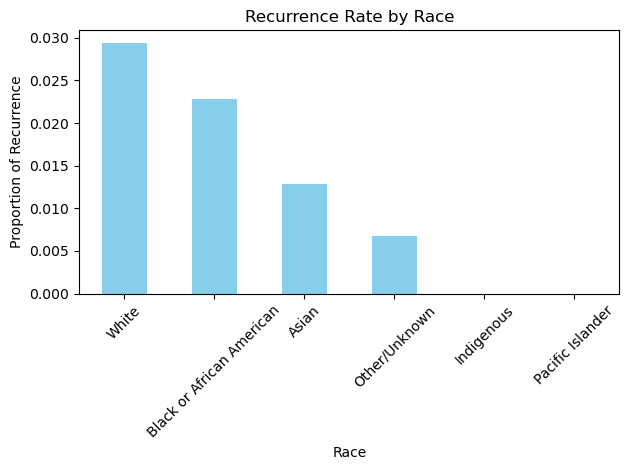

In [21]:
recurrence_by_race = df.groupby('race')['recurred'].mean().sort_values(ascending=False)

recurrence_by_race.plot(kind='bar', color='skyblue')
plt.title('Recurrence Rate by Race')
plt.ylabel('Proportion of Recurrence')
plt.xlabel('Race')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### What does this show?
The bar plot displays the proportion of thyroid cancer recurrence across different racial groups in the dataset. We observe that White patients have the highest recurrence rate, followed by Black or African American and Asian patients. Other/Unknown races show a lower recurrence rate, while Indigenous and Pacific Islander groups appear to have no recorded recurrences. However, these latter groups have very small sample sizes (5 and 3 patients, respectively), so their low recurrence rates may not be statistically meaningful. 
### Implications.
Overall, the plot suggests potential disparities in recurrence outcomes across racial groups, though further analysis would be needed to determine whether these patterns are influenced by differences in treatment access, tumor type, or stage at diagnosis.

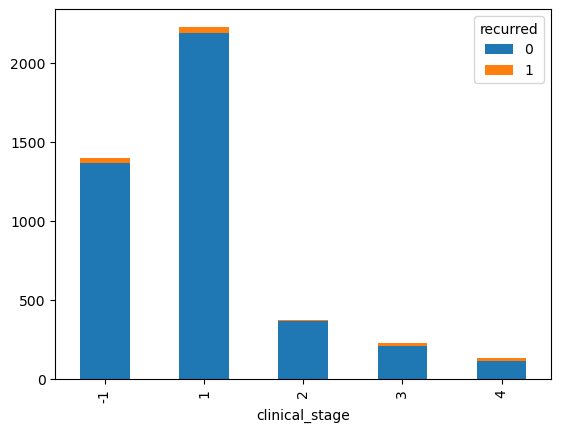

In [22]:
pd.crosstab(df['clinical_stage'], df['recurred']).plot(kind='bar', stacked=True)
plt.show()

### What does this show?
The stacked bar plot shows the distribution of thyroid cancer recurrence across clinical stages. Most patients in the dataset were diagnosed at Stage 1, which is expected given thyroid cancer is often detected early. Recurrence is relatively rare across all stages, with only a small proportion of patients in each stage experiencing a recurrence. Even among Stage 1 patients (the largest group) some recurrence is observed. 
### Implications.
Overall, the recurrence rate appears to be around 1 in 10, indicating that while recurrence is not common, it affects a meaningful subset of patients and is important to predict. This plot highlights that clinical stage may still hold predictive value, even in early-stage disease.

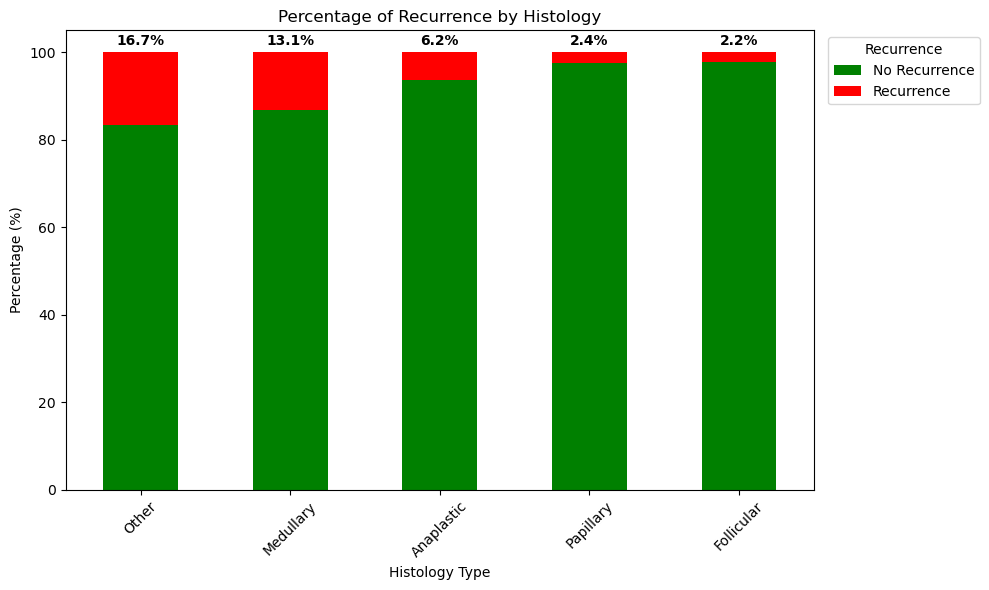

In [23]:
ct_pct = pd.crosstab(df['histology'], df['recurred'], normalize='index') * 100
ct_pct.columns = ['No Recurrence', 'Recurrence']
ct_pct = ct_pct.sort_values(by='Recurrence', ascending=False)

colors = ['green', 'red']
ax = ct_pct.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))

for i, val in enumerate(ct_pct['Recurrence']):
    ax.text(i, 100 + 1, f'{val:.1f}%', ha='center', va='bottom', color='black', fontweight='bold')

plt.title('Percentage of Recurrence by Histology')
plt.xlabel('Histology Type')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Recurrence', labels=['No Recurrence', 'Recurrence'], bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Recurrence rates vary a lot by histology:
- **Other** histologies show the highest recurrence rate: **15.0%**
- **Medullary** has the second highest: **11.1%**
- **Anaplastic** is at **6.2%**
- **Papillary** and **Follicular** types have very low recurrence rates: **2.6%** and **2.0%** respectively

These results support the hypothesis that **more aggressive histologies (like Medullary and Anaplastic) are more likely to recur**.

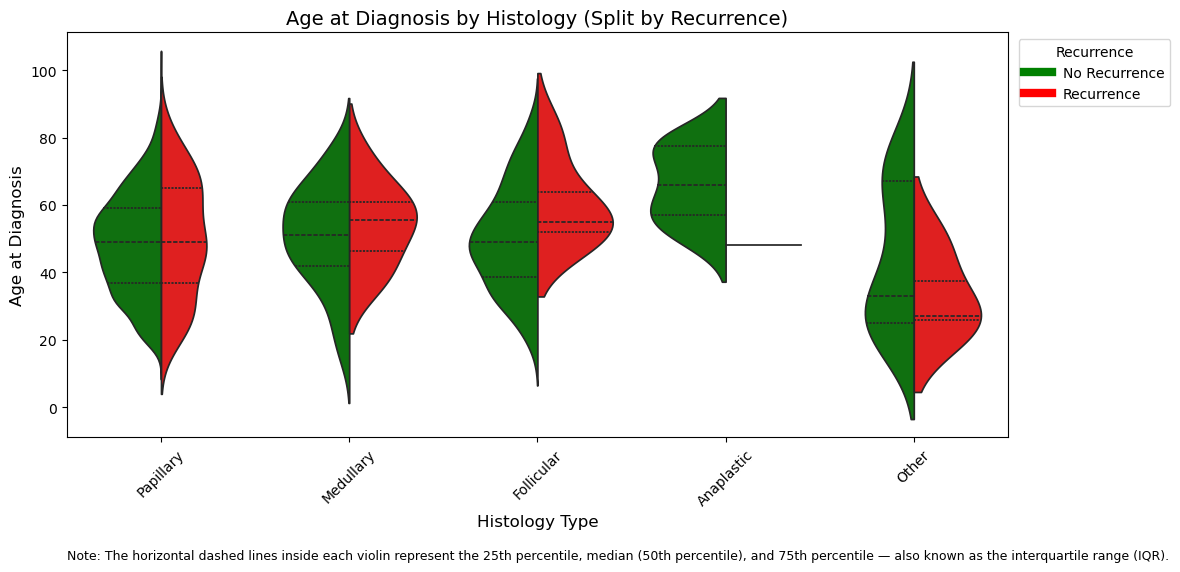

In [24]:
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=df,
    x='histology',
    y='age_at_diagnosis',
    hue='recurred',
    split=True,
    inner='quartile',
    palette={0: 'green', 1: 'red'}
)

plt.title('Age at Diagnosis by Histology (Split by Recurrence)', fontsize=14)
plt.xlabel('Histology Type', fontsize=12)
plt.ylabel('Age at Diagnosis', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

handles = [
    plt.Line2D([0], [0], color='green', lw=6),
    plt.Line2D([0], [0], color='red', lw=6)
]

plt.legend(handles=handles, labels=['No Recurrence', 'Recurrence'], bbox_to_anchor=(1.18, 1), title='Recurrence', loc='upper right')
plt.text(
    x=-0.5, y=-45,
    s="Note: The horizontal dashed lines inside each violin represent the 25th percentile, median (50th percentile), "
      "and 75th percentile — also known as the interquartile range (IQR).",
    fontsize=9,
    ha='left'
)
plt.tight_layout()
plt.show()

### What This Visualization Shows:
- **Each violin** displays the age distribution for a given histology type.
- **Left (green)** side = patients who did **not** experience recurrence.
- **Right (red)** side = patients who **did** experience recurrence.
- The **width** at any point reflects the number of patients diagnosed at that age.

### Key Takeaways:
- **Papillary & Follicular**: The age distributions for recurrence and non-recurrence are fairly similar, though recurrence cases tend to be slightly **younger**, with a **lower median** age.
- **Medullary**: Recurrence appears more common among **younger patients**, with the interquartile range (25th–75th percentile) shifted downward compared to non-recurrence.
- **Anaplastic**: The red (recurrence) side is absent, likely because there are **very few or no recurrence cases** for this type in the dataset.
- **Other histologies**: Show the most distinct difference — recurrence is concentrated between **ages 20–40**, while non-recurrence spans a broader age range, including **older patients**.


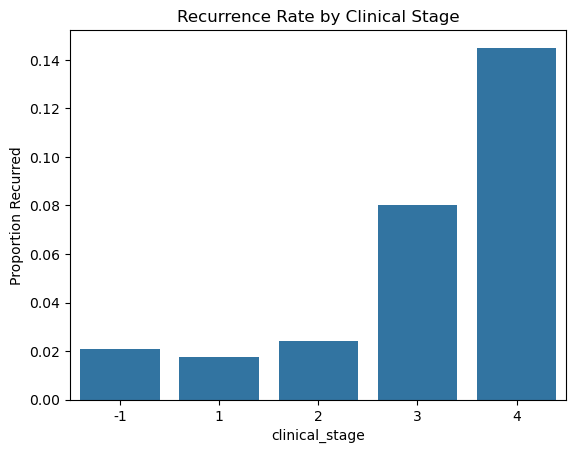

In [25]:
stage_rate = df.groupby('clinical_stage')['recurred'].mean().reset_index()

sns.barplot(x='clinical_stage', y='recurred', data=stage_rate)
plt.title('Recurrence Rate by Clinical Stage')
plt.ylabel('Proportion Recurred')
plt.show()


### What this plot shows:
This barplot shows the proportion of patients who experienced recurrence with relation to the stage of the thyroiud cancer when they were first diagnosed. On the X-axis we have the clinical stages (-1, 1, 2, 3, 4) with -1 representing NaN and Unknown values. On the Y-axis we have the proportion of patients who experienced recurrence.
- Stage 4 patients have the highest recurrence rate ~14%
- Stage 3 patients have a lower rate ~8%
- Stage 2 and 1 patients have the lowest rates at ~3% and ~2% respectively

### Interpretation:
With this plot we seem to see a strong positive trend where the more severe cases of cancer at initial diagnosis are more likely to recur later on. There is definitely a sharp jump from stages 3 and 4 showing that stage 4 is definitely a key risk group. We also see that lower stages specifically 1 and -1 (unkown) having low correlation with recurrence later on. The clear upward trend with this data means it could potentially be a strong predictor and could improve performance for predictive models.

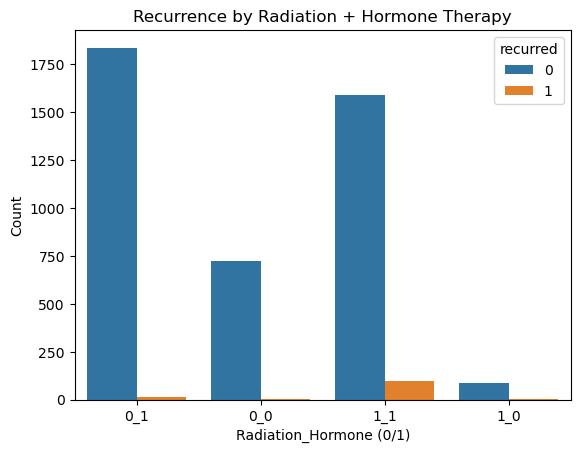

In [26]:
df['radiation_hormone'] = df['had_radiation'].astype(str) + '_' + df['had_hormone_therapy'].astype(str)

sns.countplot(x='radiation_hormone', hue='recurred', data=df)
plt.title('Recurrence by Radiation + Hormone Therapy')
plt.xlabel('Radiation_Hormone (0/1)')
plt.ylabel('Count')
plt.show()


### What this plot shows:
The groups with the largest amounts of recurrence are those who **only** received hormone therapy, and those who received **both** hormone and radiation therapy. The groups we see without hormone therapy are much smaller and barely visible, showing minimal recurrence.

This plot visualizes whether or not recurrence occurred for patients who underwent radiation therapy, hormone therapy, neither, or both. On the X-axis we have:
- 0_1 -> no radiation therapy, hormone therapy
- 0_0 -> no radiation therapy, no hormone therapy
- 1_1 -> radiation and hormone therapy
- 1_0 -> radiation, no hormone therapy

### Interpretation:
This shows us that patients who received hormone + radiation therapy were more likely to have recurring cases in the future. This is likely because thyroid cancer cases that undergo those treatments are more aggressive and advanced diseases. If a thyroid cancer case is sevever enough to require these treatments, it is more likley that it will recur in the future. 

Text(0.5, 1.0, 'Recurrence by Lymphovascular Invasion')

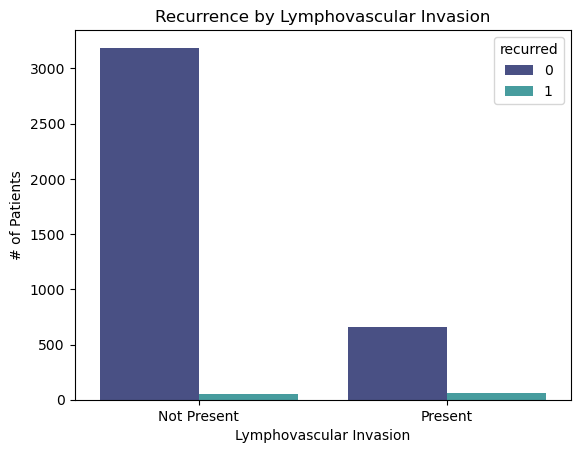

In [27]:
# filter out unknown status of lymphovascular invasion
df_lymph = df[df['lymphovascular_invasion'] != 'Unknown']
# create a countplot to find out if there is a correlation
sns.countplot(data=df_lymph, x='lymphovascular_invasion', hue='recurred', palette='mako')
# relable and title the graph
plt.xlabel('Lymphovascular Invasion')
plt.ylabel('# of Patients')
plt.title('Recurrence by Lymphovascular Invasion')

### What does this visualize?
This plot aims to visualize the significance of L.I. (Lymphovascular Invasion) when trying to predict recurrence of thyroid cancer. On the y-axis, we are showcasing the number of patients who will fall into the categories specified by the x-axis, which showcases the patients who have had L.I. and whether or not their cancer has recurred. Note that the legend indicates the following:
- 0 --> No Recurrence
- 1 --> Recurrence

### What can we infer from this?
We can see that the # of patients who have had recurrence are within the same range (about 100 or less),  which indicates that there is a minor correlation between L.I. and recurrence as around a fifth of the patients have been stated to have L.I. and experienced some form of recurrence.

Text(0, 0.5, '# of Patients')

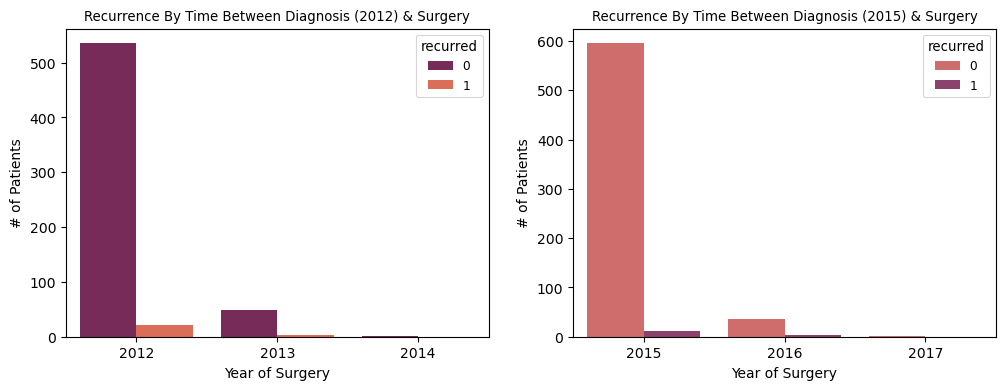

In [28]:
# setup for the plots
plt.rcParams['figure.figsize'] = (12, 4)
fig, (a1, a2) = plt.subplots(nrows=1, ncols=2)
plt.subplots_adjust(wspace=0.2)
sns.set_context("paper", rc={"figure.figsize": (8, 6)})

# create plot for diagnoses that happened in 2012
df_diag_2012 = df[df['date_at_diagnosis'] == 2012]
sns.countplot(data=df_diag_2012, x='surgery_date', hue='recurred', ax=a1, palette='rocket')
a1.set_title('Recurrence By Time Between Diagnosis (2012) & Surgery')
a1.set_xlabel('Year of Surgery')
a1.set_ylabel('# of Patients')

# create plot for diagnoses that happened in 2015
df_diag_2015 = df[df['date_at_diagnosis'] == 2015]
sns.countplot(data=df_diag_2015, x='surgery_date', hue='recurred', ax=a2, palette='flare')
a2.set_title('Recurrence By Time Between Diagnosis (2015) & Surgery')
a2.set_xlabel('Year of Surgery')
a2.set_ylabel('# of Patients')

### What does this visualize?
These graphs are trying to find a correlation between the difference in time, from diagnosis to surgical intervention, and recurrence. On the left graph, we have the number of patients who have been diagnosed in 2012 and recieved surgery within a 3 year time period and whether or not they have had recurrence in their cancer. The same can be said about the graph on the right, although the year of diagnosis starts at 2015. Note that the legend indicates the following:
- 0 --> No Recurrence
- 1 --> Recurrence

### What can we infer from this?
From these two graphs, it seems that these graphs cannot give us a strong correlation between the time from diagnosis to surgery and recurrence. Although it is not super easy to see, both graphs showcase that the cases where individuals have had surgery 3 years after diagnosis showed no recurrence at all.

## Model

We are going to start this section by preparing our model by importing tools and modifying our dataframe.

In [52]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

### Objective
We set out to build a machine learning model that predicts thyroid cancer recurrence with an AUC greater than 90% and reveals key clinical predictors of recurrence. Our hypothesis was that patients with more severe disease—reflected in staging or aggressive histology subtypes—would have a higher risk of recurrence.

In [30]:
df = df[['age_at_diagnosis', 'clinical_stage', 'pathological_stage', 'histology', 
         'lymphovascular_invasion', 'sex', 'had_radiation', 'had_hormone_therapy', 'recurred']].copy()

X = df.drop(columns='recurred')
y = df['recurred']

categorical_cols = ['histology', 'lymphovascular_invasion', 'sex']
numeric_cols = ['age_at_diagnosis','clinical_stage', 'pathological_stage', 'had_radiation', 'had_hormone_therapy']

### Handling Class Imbalance
We split the dataset into training and test sets using an 80-20 split. It's important to analyze the class imbalance at this stage to inform model selection and resampling strategies.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

print(f"Class distribution in training set:")
print(f"No recurrence: {sum(y_train == 0)} ({sum(y_train == 0)/len(y_train)*100:.1f}%)")
print(f"Recurrence: {sum(y_train == 1)} ({sum(y_train == 1)/len(y_train)*100:.1f}%)")

Class distribution in training set:
No recurrence: 3389 (97.4%)
Recurrence: 91 (2.6%)


### Preprocessing 
We apply preprocessing using ColumnTransformer, where:
- **Numerical features** are standardized using StandardScaler
- **Categorical features** are one-hot encoded using OneHotEncoder (with the first category dropped)

After preprocessing, we use **SMOTE** (Synthetic Minority Over-sampling Technique) to balance the dataset and handle class imbalance between recurred and non-recurred patients.

In [37]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
])

X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_encoded, y_train)

### Random Forest

In [53]:
rf_bal = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_bal.fit(X_train_encoded, y_train)

rf_pred = rf_bal.predict(X_test_encoded)
rf_proba = rf_bal.predict_proba(X_test_encoded)[:, 1]

print("Random Forest (Balanced) Performance:")
print(classification_report(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print(f"AUC: {roc_auc_score(y_test, rf_proba):}")

Random Forest (Balanced) Performance:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       847
           1       0.10      0.13      0.12        23

    accuracy                           0.95       870
   macro avg       0.54      0.55      0.54       870
weighted avg       0.95      0.95      0.95       870

Confusion Matrix:
 [[821  26]
 [ 20   3]]
AUC: 0.6597710589805452


### Logistic Regression with SMOTE

In [43]:
from sklearn.linear_model import LogisticRegression

lr_smote = LogisticRegression(max_iter=1000, random_state=42)
lr_smote.fit(X_train_bal, y_train_bal)

lr_pred = lr_smote.predict(X_test_encoded)
lr_proba = lr_smote.predict_proba(X_test_encoded)[:, 1]

print("Logistic Regression (SMOTE) Performance:")
print(classification_report(y_test, lr_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))
print(f"AUC: {roc_auc_score(y_test, lr_proba):}")

Logistic Regression (SMOTE) Performance:
              precision    recall  f1-score   support

           0       0.99      0.70      0.82       847
           1       0.06      0.74      0.11        23

    accuracy                           0.70       870
   macro avg       0.53      0.72      0.47       870
weighted avg       0.97      0.70      0.80       870

Confusion Matrix:
 [[589 258]
 [  6  17]]
AUC: 0.8167188542682614


### XGBoost with SMOTE

In [51]:
import xgboost as xgb

xgb_smote = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_smote.fit(X_train_bal, y_train_bal)

xgb_pred = xgb_smote.predict(X_test_encoded)
xgb_proba = xgb_smote.predict_proba(X_test_encoded)[:, 1]

print("XGBoost (SMOTE) Performance:")
print(classification_report(y_test, xgb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print(f"AUC: {roc_auc_score(y_test, xgb_proba):}")

XGBoost (SMOTE) Performance:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       847
           1       0.08      0.13      0.10        23

    accuracy                           0.94       870
   macro avg       0.53      0.55      0.54       870
weighted avg       0.95      0.94      0.95       870

Confusion Matrix:
 [[814  33]
 [ 20   3]]
AUC: 0.6724757455982752


### Performance Summary

We tested three different models to predict thyroid cancer recurrence: Random Forest (Balanced), Logistic Regression (with SMOTE), and XGBoost (with SMOTE). Here's what we found:

- **Random Forest (Balanced)**
 
This model performed very well overall with 95% accuracy, but it struggled to correctly identify patients who experienced a recurrence. Its recall for the positive class was only 13%, meaning it missed most recurrence cases. AUC was 0.66, indicating limited ability to distinguish between classes.

- **Logistic Regression (with SMOTE)**

Logistic regression caught more recurrence cases than Random Forest, achieving a recall of 74% for the positive class. However, it did so at the cost of misclassifying many non-recurrence cases, bringing accuracy down to 70%. Despite this trade-off, its AUC was the highest at 0.82, showing strong potential in ranking predictions.

- **XGBoost (with SMOTE)**

XGBoost gave a balanced accuracy of 94%, similar to Random Forest, but like it, also struggled with recall (13%) for recurrence. Its AUC was 0.67, slightly better than Random Forest but not as strong as Logistic Regression.

### Final Results

Although no model achieved our target AUC of over 90%, Logistic Regression with SMOTE came closest with an AUC of 0.82 and a recall of 74% for recurrence cases. However, we chose to focus our video on the XGBoost with SMOTE model due to its strong overall accuracy (94%) and ability to highlight important clinical predictors.

XGBoost revealed that Medullary histology, prior radiation, and lymphovascular invasion were top predictors of recurrence—supporting our hypothesis that more severe disease and treatment history are linked to higher recurrence risk. While further improvements are needed, our models demonstrate the potential of combining clinical insights with machine learning to better identify high-risk thyroid cancer patients.

### Key Predictors
Our feature importance analysis revealed that histology_Medullary and had_radiation were the top predictors of thyroid cancer recurrence, followed by lymphovascular invasion status. This supports our hypothesis that patients with more aggressive histology types and more intensive treatments are at higher risk of recurrence. Interestingly, clinical stage and pathological stage had lower importance scores in the model, indicating that staging alone may not be as predictive as initially expected. These insights highlight the potential of combining histological details and treatment history to improve recurrence prediction.

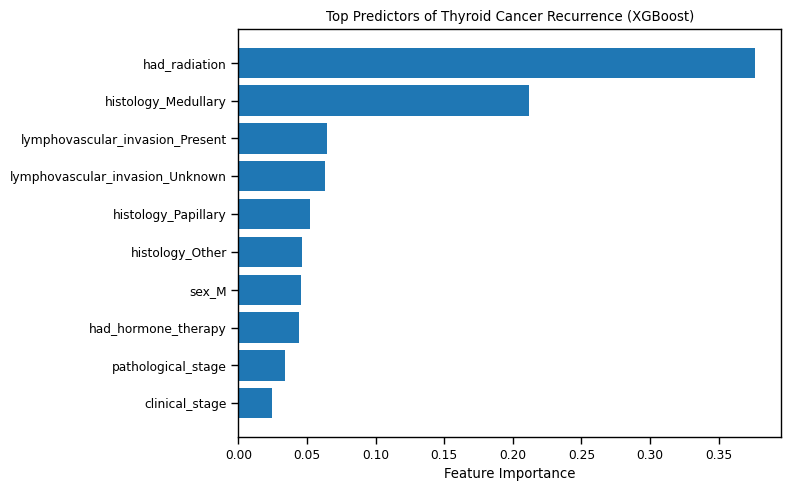

In [55]:
category = preprocessor.named_transformers_['cat']
cat_feature_names = category.get_feature_names_out(categorical_cols)
all_feature_names = numeric_cols + list(cat_feature_names)

importances = xgb_smote.feature_importances_
top_idx = np.argsort(importances)[-10:][::-1]
top_features = [all_feature_names[i] for i in top_idx]
top_values = importances[top_idx]

plt.figure(figsize=(8, 5))
plt.barh(top_features, top_values)
plt.xlabel("Feature Importance")
plt.title("Top Predictors of Thyroid Cancer Recurrence (XGBoost)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Ethics & Privacy

For our project, we used a public thyroid cancer dataset from [Mendeley Data](https://data.mendeley.com/datasets/57726vkm48/1). The dataset includes anonymized patient data from Penn Medicine cancer registries, collected between January 2013 and December 2015, and we used it to build a model that predicts whether someone's thyroid cancer might recur after treatment.

The dataset had already been anonymized by the original researchers, who removed all protected health information and replaced the original patient and tumor IDs with unrelated numbers. All dates were converted from specific dates to just years, and hospital names were replaced with generic labels like "Hospital.1" and "Hospital.2." As an additional step, we removed the ReportingHospitalID column to further protect patient privacy. We wanted to handle this real medical data responsibly throughout our project. This work is purely educational, we are not medical professionals, and our model is not intended for actual clinical use. We also did not combine this dataset with any other data sources that could create privacy concerns.

During our analysis, we examined the dataset for bias and representation issues. We checked for imbalances in patient age, gender, race/ethnicity, treatment history, and other clinical features. Based on our analysis of recurrence patterns by race, we observed that certain racial groups, particularly Indigenous and Pacific Islander populations, appeared to be significantly underrepresented in the dataset, as evidenced by zero recorded recurrences in these groups, which likely indicates very small sample sizes. We avoided making broad generalizations. Our goal was to ensure our model did not learn patterns that only applied to a specific subset of patients.

We discovered that the dataset was significantly imbalanced, with many more patients who did not experience recurrence compared to those who did. To address this class imbalance, we used SMOTE (Synthetic Minority Oversampling Technique) to create synthetic examples of patients who experienced recurrence. However, this approach raises an ethical concern: because these synthetic data points are not real patients, there is a risk that our model might learn patterns that do not actually exist in real clinical settings. We acknowledged this limitation and used appropriate evaluation metrics that account for the synthetic nature of some of our training data.

When presenting our results, we ensured our visualizations and explanations were clear and honest. We highlighted the limitations we discovered during our analysis, particularly regarding the use of synthetic data and any demographic imbalances we observed. After completing the project, we deleted all local copies of the dataset to avoid storing sensitive medical information unnecessarily.

Throughout this project, we tried to consider ethical implications at every step. We used the Deon Ethics Checklist to guide our decisions and help us think critically about our approach. As students still learning about machine learning and ethics, we wanted to ensure we were making responsible choices.


# Discusison and Conclusion

In this project, we explored whether machine learning could help predict thyroid cancer recurrence using patient data such as cancer stage, treatment history, and histology type. We worked with a clinical dataset of over 5,000 patients from Penn Medicine, but only around 100 of those patients experienced recurrence. This made the prediction task especially difficult. After cleaning the data and analyzing trends, we found that recurrence was more likely in patients with late-stage cancer and those who had undergone radiation or hormone therapy.

We tested several machine learning models and found that Logistic Regression with SMOTE gave the best results for identifying recurrence cases, with a recall of 74% and an AUC of 0.82. However, in our video and analysis, we chose to highlight the XGBoost with SMOTE model. Although it had a lower recall, it achieved strong overall accuracy (94%) and helped us interpret which clinical features were most important. According to XGBoost, the top predictors of recurrence were Medullary histology, prior radiation, and lymphovascular invasion—which supports our original hypothesis that more aggressive cancers and intensive treatments are linked to higher recurrence risk.

While our models don’t reach the level of performance needed for clinical use, this project shows how machine learning can support medical decision-making when paired with clinical knowledge. It also highlights important limitations: the dataset was highly imbalanced, and using synthetic data (SMOTE) to improve predictions introduces ethical concerns. These tools should never replace doctors, but they can help point attention toward high-risk patients. With better data and continued research, machine learning could become a valuable part of personalized cancer care.

# Team Contributions

Etharn Arnn
- Project Proposal:
    Wrote the Background and Prior Work section of the proposal
- Data Checkpoint:
    Assisted in cleaning the data chosen for the checkpoint
- EDA Checkpoint:
    Created graphs to try and correlate recurrence with clinical stage as well as status of horomone therapy
- Final Notebook:
    Created slides for the video presentation as well as contributed to discussion and conclusion

Krish Kankure
- Project Proposal:
    Came up with the Research Question and Hypothesis for the project's proposal
- Data Checkpoint:
    Added more information to the Background and Prior Work section for the checkpoint 
- EDA Checkpoint:
    Notebook was corrupted and unable to be used
- Final Notebook:
    Interpreted results from our model as well as recorded/edited the final video 

Naeem Khwajazada
- Project Proposal:
    Proposed the team expectations and project timeline
- Data Checkpoint:
    Revised hypothesis, wrote dataset description, and updated the project timeline
- EDA Checkpoint:
    Created graphs attempting to correlate recurrence to time before treatment and lymphovascular invasion
- Final Notebook:
    Formatted final notebook, reformatted data cleaning + EDA, wrote out the Team Contributions

Jiya Makhija
- Project Proposal:
    Wrote the Ethics and Privacy section of the project proposal
- Data Checkpoint:
    Revised the Team Expectations section for the data checkpoint
- EDA Checkpoint:
    Created charts showing recurrence patterns by histology type and age distributions for the EDA checpoint
- Final Notebook:
    Worked on the first iteration for the model revised the Ethics and Privacy section of the final notebook

Ishita Takkar
- Project Proposal:
    Proposed the ideal data set needed to perform an analysis
- Data Checkpoint:
    Found the dataset and performed data cleaning with the help of Ethan
- EDA Checkpoint:
    Created graphs checking correlation between recurrence and race/clinical stage
- Final Notebook:
    Refined the first model, introduced final model, reviewed final notebook and abstract